In [1]:
from pathlib import Path
checkpoint = Path('/').joinpath('workspace/outputs/2020-07-20/11-10-16')
checkpoint

PosixPath('/workspace/outputs/2020-07-20/11-10-16')

In [52]:
import numpy as np
import torch
import pytorch_lightning as pl
import torchvision
from torchvision.transforms.functional import to_pil_image
from torchvision.utils import make_grid
import hydra
import yaml
import matplotlib.pyplot as plt

In [3]:
from src.model import Encoder, Decoder
from src.integrated_model import IntegratedModel
from src.patch import make_patch2d

In [4]:
with open(checkpoint.joinpath('.hydra', 'config.yaml')) as file:
    config = hydra.utils.DictConfig(yaml.safe_load(file))
print(config)

{'callback': {'callbacks': None, 'checkpoint': {'class': 'pytorch_lightning.callbacks.ModelCheckpoint', 'params': {'filepath': None, 'mode': 'auto', 'monitor': 'val_loss', 'save_top_k': 1, 'verbose': False}}, 'early_stopping': {'class': 'pytorch_lightning.callbacks.EarlyStopping', 'params': {'min_delta': 0, 'mode': 'auto', 'monitor': 'val_loss', 'patience': '${hparams.early_stopping}', 'verbose': False}}}, 'dataset': {'class': 'src.dataset.adobe_font_char_images', 'params': {'root': '/dataset/'}}, 'dataset_output_n': 52, 'experiment_name': 'Adobe_hparam_search', 'hparams': {'batch_size': 1024, 'dataset_n': 0, 'dataset_n_splits': 5, 'early_stopping': 50, 'latent_dim': 64, 'lr': 0.001, 'max_epochs': 100000, 'min_epochs': 1, 'n_pow': 0, 'num_workers': 6, 'patch_size': 15, 'seed': 0, 'test_patch_n': [1, 2, 4, 8, 16, 32, 64, 128, 256, 512], 'train_patch_n': [1, 2, 4, 8, 16, 32, 64, 128, 256]}, 'loggers': [{'class': 'pytorch_lightning.loggers.TensorBoardLogger', 'params': {'name': '', 'save_

In [5]:
encoder = Encoder(**config.model_params.encoder)
decoder = Decoder(**config.model_params.decoder)

In [6]:
import glob

model_checkpoint = glob.glob(str(checkpoint / '**' / '*.ckpt'), recursive=True)
assert len(model_checkpoint) == 1
model_checkpoint = model_checkpoint[0]

In [7]:
transform = torchvision.transforms.Compose([hydra.utils.instantiate(i) for i in config.transform]) if config.transform else None
# target_transform = torchvision.transforms.Compose([hydra.utils.instantiate(i) for i in config.target_transform]) if config.target_transform else None
target_transform = None

____, dataset = hydra.utils.instantiate(config.dataset)
dataset.set_transform(transform, target_transform)

100%|██████████| 9828/9828 [00:01<00:00, 9534.69it/s] 


In [8]:
model = IntegratedModel.load_from_checkpoint(model_checkpoint, encoder=encoder, decoder=decoder, optim=None, dataset=dataset)
model

IntegratedModel(
  (encoder): Encoder(
    (linear_0): Linear(in_features=225, out_features=256, bias=True)
    (linear_1): Linear(in_features=256, out_features=256, bias=True)
    (linear_2): Linear(in_features=256, out_features=64, bias=True)
  )
  (decoder): Decoder(
    (linear_0): Linear(in_features=64, out_features=256, bias=True)
    (linear_1): Linear(in_features=256, out_features=256, bias=True)
    (linear_2): Linear(in_features=256, out_features=52, bias=True)
  )
)

In [9]:
patch_size = config.hparams.patch_size
n_pow = 0 - config.hparams.n_pow
print(n_pow)

patch = torch.zeros([1, 100, 1, patch_size, patch_size])
a = patch[:, :1]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())
a = patch[:, :10]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())
a = patch[:]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())

print()

patch = torch.ones([1, 100, 1, patch_size, patch_size])
a = patch[:, :1]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())
a = patch[:, :10]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())
a = patch[:]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())

print()

patch = torch.rand([1, 100, 1, patch_size, patch_size])
a = patch[:, :1]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())
a = patch[:, :10]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())
a = patch[:]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())

print()

patch = torch.rand([1, 100, 1, patch_size, patch_size])
a = patch[:, :1]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())
a = patch[:, :10]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())
a = patch[:]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())

print()

patch = torch.rand([1, 100, 1, patch_size, patch_size])
a = patch[:, :1]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())
a = patch[:, :10]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())
a = patch[:]
a = encoder(a) / a.shape[1]**n_pow
print(a.mean().item(), a.var().item(), a.max().item(), a.min().item())


0
-0.00873546302318573 0.006147111300379038 0.1780572235584259 -0.5008330941200256
-0.0873546451330185 0.6147111058235168 1.7805720567703247 -5.008330821990967
-0.8735462427139282 61.47106170654297 17.805736541748047 -50.083274841308594

0.0003907713107764721 0.0007709919009357691 0.12149326503276825 -0.08165068179368973
0.003907716833055019 0.07709918171167374 1.2149325609207153 -0.8165066242218018
0.03907732665538788 7.709926128387451 12.149332046508789 -8.165070533752441

0.0004006603849120438 0.00280206510797143 0.16049744188785553 -0.20188288390636444
0.03255486860871315 0.18446774780750275 1.6356579065322876 -1.458034634590149
0.17564049363136292 24.284608840942383 19.12886619567871 -17.263090133666992

-0.0031820214353501797 0.017106378450989723 0.41799163818359375 -0.6773737668991089
-0.015003873966634274 0.2958102226257324 2.15407133102417 -2.1791157722473145
0.055018022656440735 22.773460388183594 19.796470642089844 -17.343021392822266

0.005366566590964794 0.0014359417837113

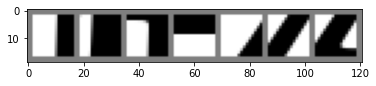

[[-0.005832 -0.01417   0.034587 -0.054413 -0.073938 -0.084588 -0.003337]
 [ 0.020267  0.028471  0.040354  0.106867  0.122378  0.152505  0.624353]
 [ 0.56486   0.641238  1.020964  1.140027  0.853309  0.961325  4.597016]
 [-0.707893 -0.925533 -0.333285 -1.720084 -1.334027 -1.476961 -1.803752]
 [ 1.272753  1.566771  1.354249  2.860111  2.187335  2.438286  6.400768]
 [ 1.130919  1.34408   1.618294  2.630994  2.838957  3.172654  6.27176 ]]


In [141]:
index = (patch.mean([1, 2, 3, 4]) - 0.5).abs().argmin()
# index = 2470
w = range(16)
w = [12, 1, 6, 3, 5, 7, 4]
plt.imshow(to_pil_image(make_grid(patch[index, w], nrow=9, pad_value=0.5)))
plt.show()

tmp = np.get_printoptions()
np.set_printoptions(precision=6, suppress=True)

b = []
for p in patch[index, w]:
    a = encoder(p[None])
    b.append([a.mean().item(), a.var().item(), a.max().item(), a.min().item(), a.max().item() - a.min().item(), a.norm().item()])
print(np.array(b).T)

np.set_printoptions(**tmp)

189.0
0 AGaramondPro-BoldItalic capA


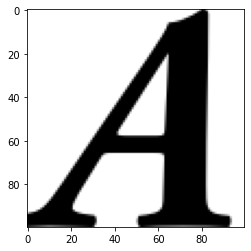


tensor(2737)
(true_class == predicted_class).item()=True
capA 0.9999884366989136
capA 0.9999884366989136


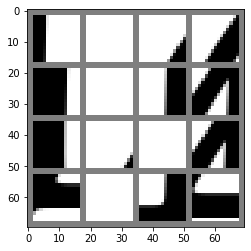

In [112]:
print(len(dataset) / 52)
with torch.no_grad():
    for i, (image, t) in zip(range(52 * 4), dataset):
        font = t['font']
        class_ = t['alphabet']
        print(i, dataset.unique_font[font], dataset.unique_alphabet[class_])
        plt.imshow(to_pil_image(image), 'gray')
        plt.show()
        print()
        x = image[None].expand([2**16, -1, -1, -1])
        for patch_n, nrow in zip(*zip([16, 4], [2, 2], [4, 2], [8, 4])):
            patch = make_patch2d(x, config.hparams.patch_size, patch_n)
            y = model(patch)
            max_index = y[:, class_].argmax()
            print(max_index)

            true_class = class_
            true_prob = y[max_index].softmax(0)[class_].item()
            predicted_class = y[max_index].argmax(0)
            predicted_prob = y[max_index].softmax(0)[predicted_class].item()
            
            print(f'(true_class == predicted_class).item()={(true_class == predicted_class).item()}')
            print(dataset.unique_alphabet[true_class], true_prob)
            print(dataset.unique_alphabet[predicted_class], predicted_prob)
            plt.imshow(to_pil_image(make_grid(patch[max_index], nrow=nrow, pad_value=0.5)))
            plt.show()
            print()
            break
        break